# `numpy` and `scipy`

In [24]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.fft
import scipy.integrate
import scipy.spatial

## `numpy.ndarray`

In the first year course, we discovered that there is a highly optimised Python package that is widely used in the scientific computing community called `numpy`. The main object in `numpy` is the `numpy.ndarray` class. As a reminder we will show you how to initialise some `numpy.ndarray` instances and some of their operations.

### 1D Array (Row Vector)

We can create a 1D `numpy` array by passing a `list` of numbers to the `np.array` function:
```python
array = np.array([0, 1, 2])
```

### 2D Array (Column Vector or Matrix)

A column vector is 2D `numpy` array which can be initialised by using nested `list` objects. The transpose can be taken using `array.T`
```python
array = np.array([[0], [1], [2]])
array.T # transpose
```

A matrix is also a 2D array which is initialised in the same way as a column vector.
```python
array = np.array([
    [1.0, 2.0, 3.0],
    [2.0, 4.0, 5.0],
    [3.0, 2.5, 5.6],
])
```

### How to index arrays

Arrays are indexed in a similar way to lists. To access element $A_{ij}$ of an array, square brackets are used to select first the row and then the column. In the same way that lists can be sliced using a colon (`:`), arrays can also be sliced. Each element that is sliced adds another dimension to the array.
```python
array[1, 2] # returns a number
array[1, :2] # returns a 1D array
array[:, 2:5] # returns a 2D array
```

In [5]:
array = np.array([0, 1, 2])
print(f'1D Array:\n{array}\n')

array = np.array([[0], [1], [2]])
print(f'2D Array with 1 row:\n{array}\n')
print(f'Transposed:\n{array.T}\n')

array = np.array([[0, 1, 2], [1, 2, 3]])
print(f'2D Array:\n{array}\n')

array = np.array([
    [1.0, 2.0, 3.0],
    [2.0, 4.0, 5.0],
    [3.0, 2.5, 5.6],
])
print(f'2D Array using floats:\n{array}\n')

print(f'Indexing arrays:\n{array[1, :2]}\n\n{array[1, 2]}\n\n{array[:, 2:5]}\n')

1D Array:
[0 1 2]

2D Array with 1 row:
[[0]
 [1]
 [2]]

Transposed:
[[0 1 2]]

2D Array:
[[0 1 2]
 [1 2 3]]

2D Array using floats:
[[1.  2.  3. ]
 [2.  4.  5. ]
 [3.  2.5 5.6]]

Indexing arrays:
[2. 4.]

5.0

[[3. ]
 [5. ]
 [5.6]]



## Working with Vectors

In this section we are going to look into using vector, array and matrix operations to speed up our code. 

Vectors and arrays are used throughout the computing world. For example, as you have seen (or will see!) during the Math course, matrix/vector and matrix/matrix multiplications can be used to implement geometric operations such as rotations or translations. 

To demonstrate this, the cartesian basis shall be generated here in matrix form. This means that row 0 is the x-axis, row 1 the y-axis, and row 2 the z-axis. This can be done quickly using the `np.eye(N)` function which returns the identity matrix for an NxN matrix.
```python
xyz = np.eye(3)
```
To confirm that the x- and y- axis are orthogonal, the angle can be calculated by taking the inverse cosine (also known as the arc-cosine) of the dot product of the first and second rows. We do this in one line (in the cell this is formatted over 2 lines to improve legibility):
```python
angle = np.arccos(np.dot(xyz[0], xyz[1]))
```
> Note how `angle = np.arccos(np.dot(xyz[0], xyz[1]))` contains the result of one function `np.dot(...)` passed as an argument to another function `np.arccos(...)` - This is useful for reducing the number of lines in code, which is sometimes desirable, especially for conceptually simple functions. However, do not abuse this: it is often more desirable to have a few more lines of code if it makes it more readable!

To confirm that z-axis is orthogonal to both the x- and y-axis, we can use the cross product, `np.cross(v1, v2)` and compare with row 2 (i.e. the final row) of the `xyz` matrix. 

### Comparison between vectors / numpy arrays

Usually when comparing variables, the is-equal operator (`==`) is used (i.e. `1+1 == 2` returns `True`). However, for `np.ndarray` objects (the technical name for a numpy array), the array comparison is done over each element in the array, and a new boolean `np.ndarray` is returned which contains **one boolean element for each row in the original two arrays**. To confirm that at least one of these elements is `True`, the `np.any(boolean_array)` is used, and to confirm that all of the elements are `True`, the `np.all(boolean_array)` is used.
```python
normal = np.cross(xyz[0], xyz[1]) # array([0., 0., 1.0])
boolean_array = xyz[2]==normal # array([True True True])
np.all(boolean_array) # True
```

In [6]:
xyz = np.eye(3)
print(f'x: {xyz[0]}\ny: {xyz[1]}\nz: {xyz[2]}\n')

# using np.arccos, we get the inverse cosine in radians
angle = np.arccos(
    # np.dot gives the dot product
    np.dot(xyz[0], xyz[1])
)
print(f'Angle between x and y: {180 * angle/np.pi}°')

x: [1. 0. 0.]
y: [0. 1. 0.]
z: [0. 0. 1.]

Angle between x and y: 90.0°


In [17]:
normal = np.cross(xyz[0], xyz[1])
print(f'Normal vector to plane that contains xy:\n  {normal}')
der =  np.array([0==0*1])
print(f'xyz[2]==normal: {xyz[2] == normal}')
np.all(xyz[2]==normal)
np.all(der)

Normal vector to plane that contains xy:
  [0. 0. 1.]
xyz[2]==normal: [ True  True  True]


True

**What are we doing in the next cell? Which operation does this matrix represent?**

In [18]:
half_root_2 = 2 ** 0.5 / 2

matrix = np.array([
    [ half_root_2, half_root_2, 0.0],
    [-half_root_2, half_root_2, 0.0],
    [ 0.0        , 0.0        , 1.0],
])

new_basis = np.matmul(matrix, xyz)
[print(f'New e{i+1}:\n\t{new_basis[i]}') for i in range(3)]
None

New e1:
	[0.70710678 0.70710678 0.        ]
New e2:
	[-0.70710678  0.70710678  0.        ]
New e3:
	[0. 0. 1.]


## Linear Algebra

### Solving simultaneous Equations

Simultaneous equations are easily solved using matrices and linear algebra. For example here are to methods for solving a simple set of two simultaneous equations:

| Regular | Matrix |
| :---: | :---: |
|\begin{align}
2x + 5y &= 10\\
4x - 2y &= 15\\\\
4x - 2 \times 2x &= 0\\
-2y - 2 \times 5y &= -12y\\
15 - 2 \times 10 &= -5\\
\therefore -12y &= -5\\
\therefore y &= \frac{5}{12}\\\\
2x + 5 \times \frac{5}{12} &= 10 \\
\therefore 2x &= 10-\frac{25}{12}\\
\therefore x &= 3\frac{23}{24}
\end{align} | \begin{align}
2x + 5y &= 10\\
4x - 2y &= 15\\\\
\begin{bmatrix}
2 & 5\\
4 & -2
\end{bmatrix}\begin{bmatrix}
x \\
y
\end{bmatrix}&=\begin{bmatrix}
10 \\
15
\end{bmatrix}\\
\begin{bmatrix}
x \\
y
\end{bmatrix}&=\begin{bmatrix}
2 & 5\\
4 & -2
\end{bmatrix}^{-1}\begin{bmatrix}
10 \\
15
\end{bmatrix}\\
&=\frac{1}{-4-20}\begin{bmatrix}
-2 & -5\\
-4 & 2
\end{bmatrix}\begin{bmatrix}
10 \\
15
\end{bmatrix}\\
&=-\frac{1}{24}\begin{bmatrix}
-95 \\
-10
\end{bmatrix}\\
\therefore x &= 3\frac{23}{24}\quad y = \frac{5}{12}
\end{align} |

To achieve this result in Python, we use the `np.linalg` library to calculate the inverse of the matrix, and then we use `np.matmul` to do the calculation. An example is provided below, and without the `print` statements and condensed down to one line it looks like this:
```python
answer = np.matmul(
    np.linalg.inv(np.array([
        [2.0,  5.0],
        [4.0, -2.0],
    ])), 
    np.array([
        [10],
        [15]
    ])
)
```

In [9]:
matrix = np.array([
    [2.0,  5.0],
    [4.0, -2.0],
])

result = np.array([
    [10],
    [15]
])

print(f'Matrix:\n{matrix}\n')
print(f'Result:\n{result}\n')

inverse = np.linalg.inv(matrix)
print(f'Inverse:\n{inverse}\n')
      
answer = np.matmul(inverse, result)
print(f'Answer:\n{answer}\n\nx={int(round(answer[0][0]*24))}/24, y={int(round(answer[1][0]*24))}/24')

Matrix:
[[ 2.  5.]
 [ 4. -2.]]

Result:
[[10]
 [15]]

Inverse:
[[ 0.08333333  0.20833333]
 [ 0.16666667 -0.08333333]]

Answer:
[[3.95833333]
 [0.41666667]]

x=95/24, y=10/24


Important !!!
print(f'Answer:\n{answer}\n\nx={int(round(answer[0][0]*24))}/24, y={int(round(answer[1][0]*24))}/24')

## `scipy`

At this point, we introduce a new package called `scipy`. `scipy` contains a wide variety of specialist scientific computing modules which are necessary when `numpy` does not have the capabilities. Here we show three among the most useful of the **hundreds of algorithms** for numerical analysis that `scipy` implements for you: **Numerical Integration**, **Fourier Transforms** and **Multi-dimensional distance calculations**. We will also use these examples to present additional features of the Python language.  

More references and a general presentation of the whole `scipy` library can be found [here](https://www.scipy.org/)

### Numerical Integration

Integrating a function is often very difficult and sometimes impossible to do analytically, and for these cases, numerical techniques must be used. Let us make here an example with a complicated mathematical function, and some different `scipy` methods for integrating it.

\begin{align}
f(x) &= \log\Bigg(\cos\big(e^{-x^2}\big) + \sin\Big(\frac{\text{erf } x}{1+x^3}\Big)\Bigg)
\end{align}  

In the cell below implementing numerical integration, you should notice two new aspects: 

- The use of the error function. It can be called using the `scipy.special.erf` function. We include it in this example because it is difficult to integrate. In fact, even its definition is given through and integral!:

\begin{align}
\text{erf}z=\frac{2}{\sqrt{\pi}}\int_0^ze^{-t^2}dt
\end{align}

- The second new concept is the idea of passing the items of an `iterable object` as the arguments of a function, instead of passing each argument one by one. 

To do this we declare the arguments of the integration functions using the variable `args`. This single variable can then be passed to the integration function arguments using `function(*args)`. When you do this, the items inside the iterable are passed in the same order as they appear in it to the function and mapped to its positional arguments (and for this reason their number must be equal to the number of arguments the function requires). Here is an example of how this works:

```python
def circle(r: float, colour: str):
    ...
    return

args = [25.0, 'red']

circle(args[0], args[1]) # calls circle 
circle(*args) # is the same as the above line
```

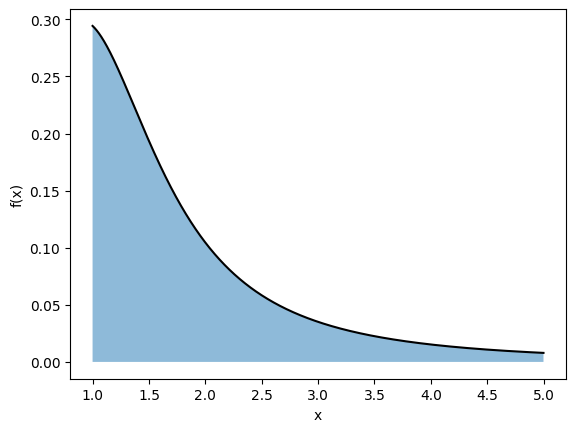

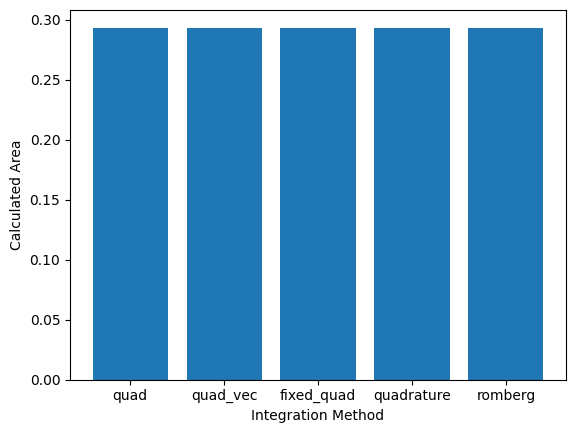

In [25]:
def func(x: np.ndarray) -> np.ndarray:
    """Applies complicated function to array"""
    return np.log((np.cos(np.exp(-x ** 2)) + np.sin((scipy.special.erf(x)/(1+x**3)))))

# create the bounds and the x, y values
low, high = (1.0, 5.0)
v = np.arange(low, high, 0.001)
y = func(v)

# plot the function
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(v, y, 'k-')
ax.fill_between(v, 0, y, alpha=0.5)

# create a tuple of the arguments
args = (func, low, high)

# do the integration using different strategies
quad = scipy.integrate.quad(*args)
quad_vec = scipy.integrate.quad_vec(*args)
fixed_quad = scipy.integrate.fixed_quad(*args)
quadrature = scipy.integrate.quadrature(*args)
romberg = scipy.integrate.romberg(*args)

# plot the strategies and their values
fig, ax = plt.subplots()
ax.set_xlabel('Integration Method')
ax.set_ylabel('Calculated Area')
ax.bar(
    ['quad', 'quad_vec', 'fixed_quad', 'quadrature', 'romberg'],
    [quad[0], quad_vec[0], fixed_quad[0], quadrature[0], romberg,]
)
plt.show()

### Fourier Transforms

The fast-Fourier transform (FFT) started being used in the mainstream in the 1960s, and is now an important tool used to make discrete Fourier transforms and inverse discrete Fourier transforms in the modern, with the main applications being in digital signal processing. 

`scipy` has an FFT algorithm contained in an easy to use format, and below, we have created a function to demonstrate how it can be used, and also how to visualise the results.

In this section, we will go through how each of the four returned components `_x`, `_y`, `_xf`, `_yf`.

For `_x`, we generate `N` entries spread evenly in linear space from `0.0` to the total time which is described by `N` timesteps with interval `t`.
```python
_x = np.linspace(0.0, N*t, N)
```

For `_y`, we use `_x` which is a 1D-array, and loop over all intensity/frequency pairs adding the result of a sine wave generated by these pairs. The `zip` function, attaches two lists to return a tuple of `list_0[i], list_1[i], ... list_N[i]` for each iteration in the original lists.

```python
for intensity, frequency in zip(intensity_list, frequency_list):
    _y += intensity * np.sin(frequency * 2.0*np.pi*_x)
```

For `_xf`, the inverse time domain (aka the frequency domain) is created as an evenly spaced 1D-array ranging from 0.0 to the highest frequency, which is given by $\frac{1}{2t}$, with an interval of N/2.

```python
_xf = np.linspace(0.0, 1.0/(2.0*t), N//2)
```

For `_yf`, the Fourier transform of `_y` is taken by calling the `scipy.fft.fft` function and then scaling by a factor of $\frac{2}{N}$, and slicing to half the value of `N`.
```python
_yf = scipy.fft.fft(_y)
_yf = 2.0/N * np.abs(_yf[0:N//2])
```

In [32]:

# test

list1 = list(np.arange(-10,10,1))
list2 = list(np.arange(-11,9,1))

a = (zip(list1,list2))

print (list(a))



[(-10, -11), (-9, -10), (-8, -9), (-7, -8), (-6, -7), (-5, -6), (-4, -5), (-3, -4), (-2, -3), (-1, -2), (0, -1), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8)]


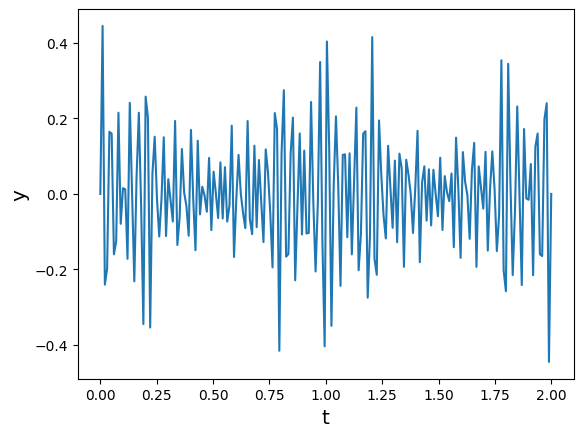

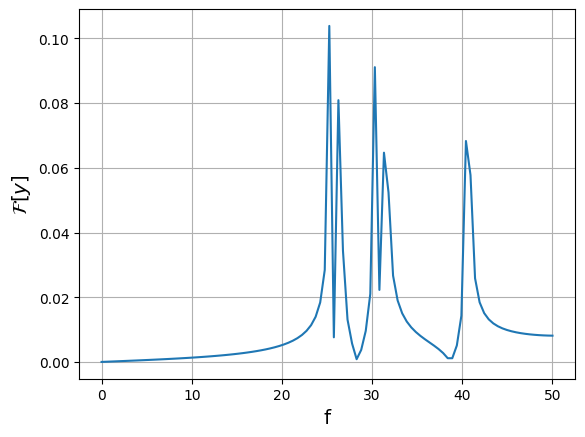

In [11]:
def generate_signal(
    intensity_list: list, 
    frequency_list: list,
    N: int = 200,
    t: float = 1./100.,
    noise: float = 0.0
) -> tuple:
    
    # check that lists are the same size
    assert len(intensity_list) == len(frequency_list)
    
    # create signal
    _x = np.linspace(0.0, N*t, N)
    
    # for each intensity and frequency, add a new sine component
    _y = _x * 0.
    for intensity, frequency in zip(intensity_list, frequency_list):
        _y += intensity * np.sin(frequency * 2.0*np.pi*_x)
            
    # create frequency domain
    _xf = np.linspace(0.0, 1.0/(2.0*t), N//2)
    
    # do fourier transform using scipy.fft.fft(y)
    _yf = scipy.fft.fft(_y)
    
    # apply scaling factor and take only real part
    _yf = 2.0/N * np.abs(_yf[0:N//2])
    
    # return tuple of real domain and inverted domain
    return _x, _y, _xf, _yf

# Create and plot signal in time domain
x, y, xf, yf = generate_signal(
    [0.1, 0.1, 0.1, 0.1, 0.1], 
    [25., 30., 40., 26., 31.]
)

# plot time domain
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('t', fontsize='x-large')
ax.set_ylabel('y', fontsize='x-large')
plt.show()

# plot frequency domain
fig, ax = plt.subplots()
ax.plot(xf, yf)
ax.grid()
ax.set_xlabel('f', fontsize='x-large')
ax.set_ylabel(r"$\mathcal{F}[y]$", fontsize='x-large')
plt.show()

### Pairwise distances in many dimensions

Calculating pair-wise distances between points in multiple dimensions is used quite often in scientific computing applications, for example, both in molecular simulations (in 3D) and machine learning. In fact, you will see how this is an important step for algorithms based on nearest neighbour estimations in Lecture 4 and 5). 

Below, we present a function that manually iterates over all particles in a 2D system and returns an array of their pairwise distances, and the same thing **done in one line using `scipy`**. In this example, we do not present the performance increase, and leave this as an exercise for the reader, but you should really try to do it, especially when a large number of points are involved.

In this section there are two new functions that are used.
```python
scipy.spatial.distance.pdist(positions)
```
This line returns a 1D-array that follows a triangular number pattern.
```python
[0]
[1]
[2]
[3]

[0->1, 0->2, 0->3, 1->2, 1->3, 2->3]
```
This is efficient for storing the positional data, which is useful for larger systems. However, this is not particular legible, and as such a function called:
```python
scipy.spatial.distance.squareform(distances)
```
This returns a 2D, NxN array where `array[i][j]==array[j][i]` is the distance between `positions[i]` and `positions[j]`, which looks like this:
```python
[
    [0->0, 0->1, 0->2, 0->3],
    [1->0, 1->1, 1->2, 1->3],
    [2->0, 2->1, 2->2, 2->3],
    [3->0, 3->1, 3->2, 3->3],
]
```
> A condensed array has $(N-1)(N-2)$ entries whereas a squareform array has $N^2$ entries which takes up much more memory as N increases

Positions:
          0         1
0  0.630043  0.811915
1  0.253577  0.791686
2  0.711936  0.029095
3  0.558583  0.339630
4  0.546459  0.627995

Distances:
          0         1         2         3         4
0  0.000000  0.377008  0.787092  0.477661  0.202022
1  0.377008  0.000000  0.889740  0.545329  0.335521
2  0.787092  0.889740  0.000000  0.346336  0.621340
3  0.477661  0.545329  0.346336  0.000000  0.288620
4  0.202022  0.335521  0.621340  0.288620  0.000000
Scipy Distance:
          0         1         2         3         4
0  0.000000  0.377008  0.787092  0.477661  0.202022
1  0.377008  0.000000  0.889740  0.545329  0.335521
2  0.787092  0.889740  0.000000  0.346336  0.621340
3  0.477661  0.545329  0.346336  0.000000  0.288620
4  0.202022  0.335521  0.621340  0.288620  0.000000


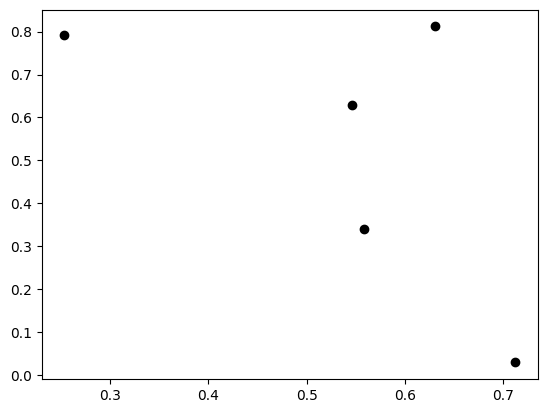

In [38]:
def generate_positions(N: int) -> np.ndarray:
    positions = np.array([
        [random.random() for i in range(N)],
        [random.random() for i in range(N)],
    ]).T
    return positions

positions = generate_positions(5)
print(f"Positions:\n{pd.DataFrame(positions)}\n")
plt.plot(positions[:, 0], positions[:, 1], 'ko')

def distance(array: np.ndarray) -> np.ndarray:
    # initialise results array
    results = np.zeros(shape=(len(array), len(array)))
    
    # iterate over each row
    for i, row_1 in enumerate(array):
        
        # iterate over each row again
        for j, row_2 in enumerate(array):
            
            
            # calculate the distance and allocate to top-half of array
            results[i, j] = np.linalg.norm(row_2 - row_1)
            
            # copy to bottom-half of array
            results[j, i] = results[i, j]
            
    # return results
    return results

distances = pd.DataFrame(distance(positions))

# use dataframe for presentation
scipy_distances = pd.DataFrame(
    # use squareform for presentation in 2D of 1D array
    scipy.spatial.distance.squareform(
        # this is the equivalent of the distance function
        scipy.spatial.distance.pdist(positions)
    ) # closing scipy.spatial.distance.squareform
) # closing pd.DataFrame
print(f'Distances:\n{distances}')
print(f'Scipy Distance:\n{scipy_distances}')

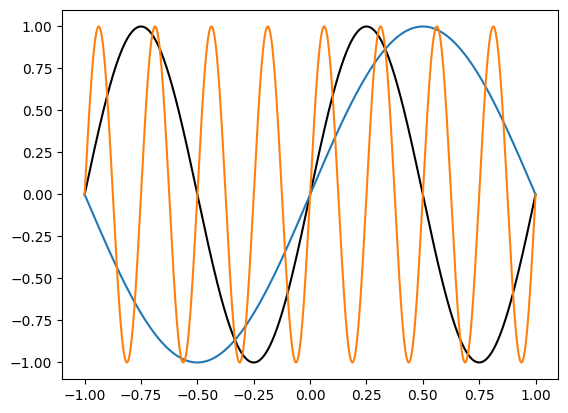

In [23]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.linspace(-1,1,1000)

fig,ax = plt.subplots()
ax.plot(x,np.sin(2*np.pi*x),'k')
ax.plot(x,np.sin(1*np.pi*x))
ax.plot(x,np.sin(8*np.pi*x))

plt.show()